In [1]:
# Import required libraries for data handling and database operations
import pandas as pd
import sqlite3

In [7]:
# Step 1: Load transactional order data from CSV file
orders = pd.read_csv("/Users/tanisha/Documents/Hackathon/orders.csv")
# Preview first few rows
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [6]:
# Check structure and data types of orders dataset
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  int64  
 1   user_id          10000 non-null  int64  
 2   restaurant_id    10000 non-null  int64  
 3   order_date       10000 non-null  object 
 4   total_amount     10000 non-null  float64
 5   restaurant_name  10000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


In [9]:
# Step 2: Load user master data from JSON file
users = pd.read_json("/Users/tanisha/Documents/Hackathon/users.json")
# Preview data
users.head()


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [11]:
# Step 3: Create SQLite database and execute restaurant SQL script
conn = sqlite3.connect("restaurants.db")

with open("/Users/tanisha/Documents/Hackathon/restaurants.sql", "r") as f:
    sql_script = f.read()
conn.executescript(sql_script)


In [12]:
# Read restaurant table into pandas dataframe
restaurants = pd.read_sql(
    "SELECT * FROM restaurants",
    conn
)

restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [17]:
# Check restaurant dataset structure
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_id    500 non-null    int64  
 1   restaurant_name  500 non-null    object 
 2   cuisine          500 non-null    object 
 3   rating           500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [13]:
# Step 4: Merge orders with users using LEFT JOIN
# Keeps all orders even if user info is missing
orders_users = orders.merge(
    users,
    on="user_id",
    how="left"
)

orders_users.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular


In [14]:
# Merge previous result with restaurant data using LEFT JOIN

final_df = orders_users.merge(
    restaurants,
    on="restaurant_id",
    how="left"
)

final_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [15]:
# Validate that no orders were lost during merging
print("Orders rows:", len(orders))
print("Final rows:", len(final_df))


Orders rows: 10000
Final rows: 10000


In [16]:
# Check missing values in dataset
final_df.isnull().sum()


order_id             0
user_id              0
restaurant_id        0
order_date           0
total_amount         0
restaurant_name_x    0
name                 0
city                 0
membership           0
restaurant_name_y    0
cuisine              0
rating               0
dtype: int64

In [18]:
# Step 5: Export final combined dataset
final_df.to_csv("final_food_delivery_dataset.csv", index=False)

/var/folders/1y/cvn04b6s6bg1b5l83sy6t70h0000gn/T/ipykernel_26085/2927400938.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df['order_date'] = pd.to_datetime(final_df['order_date'])


<Axes: title={'center': 'Daily Order Trend'}, xlabel='order_date'>

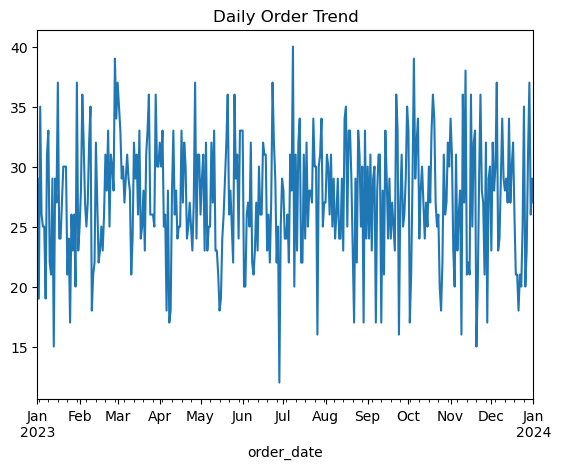

In [19]:
# ---------------------------------------------------------
# 1. ORDER TRENDS OVER TIME
# Objective: Analyze how order volume changes over time
# ---------------------------------------------------------

# Convert order_date column to datetime format
final_df['order_date'] = pd.to_datetime(final_df['order_date'])

# Group data by date and count number of orders per day
daily_orders = final_df.groupby('order_date')['order_id'].count()

# Plot daily order trend
daily_orders.plot(title="Daily Order Trend")


In [20]:
# ---------------------------------------------------------
# 2. USER BEHAVIOR PATTERNS
# Objective: Understand ordering frequency and spending
# ---------------------------------------------------------

# Calculate number of orders placed by each user
orders_per_user = final_df.groupby('user_id')['order_id'].count()

# Display statistical summary of user ordering behavior
orders_per_user.describe()


count    2883.000000
mean        3.468609
std         1.792682
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: order_id, dtype: float64

In [23]:
# Calculate average order amount spent per user
user_spend = final_df.groupby('user_id')['total_amount'].mean()

# Display spending summary statistics
user_spend.describe()


count    2883.000000
mean      799.247530
std       251.053045
min       102.220000
25%       640.187500
50%       800.686000
75%       961.117083
max      1497.420000
Name: total_amount, dtype: float64

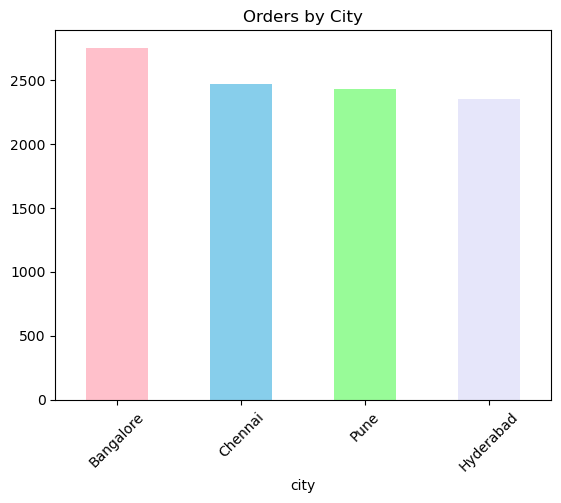

In [35]:
# ---------------------------------------------------------
# 3A. CITY-WISE PERFORMANCE
# Objective: Identify cities generating most orders
# ---------------------------------------------------------

# Count orders grouped by city
city_orders = final_df.groupby('city')['order_id'].count()

# Plot city-wise order distribution
city_orders.sort_values(ascending=False).plot(
    kind='bar',
    title='Orders by City',
    color=['pink','skyblue','palegreen','lavender']
)
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.show()


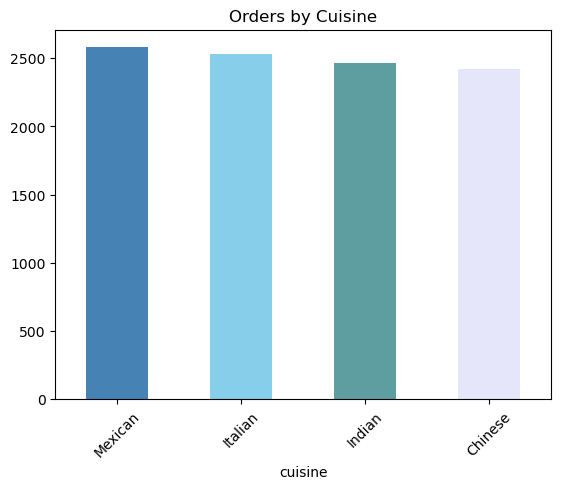

In [36]:
# ---------------------------------------------------------
# 3B. CUISINE-WISE PERFORMANCE
# Objective: Identify most popular cuisines
# ---------------------------------------------------------

# Count orders by cuisine type
cuisine_orders = final_df.groupby('cuisine')['order_id'].count()

# Plot cuisine popularity
cuisine_orders.sort_values(ascending=False).plot(
    kind='bar',
    title='Orders by Cuisine',
    color=['steelblue','skyblue','cadetblue','lavender']
)
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.show()


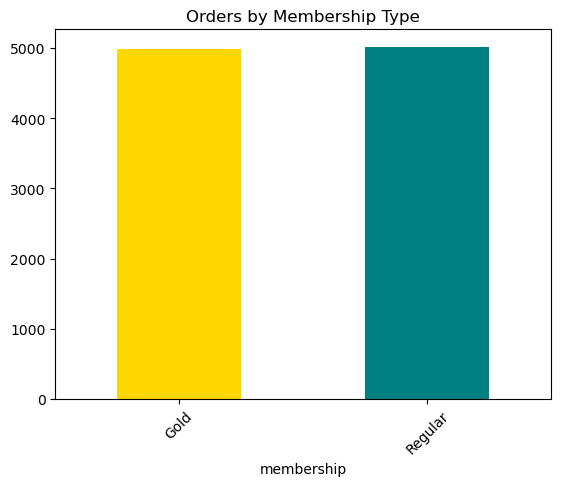

In [40]:
# ---------------------------------------------------------
# 4A. MEMBERSHIP ORDER COMPARISON
# Objective: Compare order count by membership type
# ---------------------------------------------------------

# Count orders grouped by membership type
membership_orders = final_df.groupby('membership')['order_id'].count()

# Plot order distribution
membership_orders.plot(
    kind='bar',
    title='Orders by Membership Type',
    color=['gold','teal']
)
plt.xticks(rotation=45)
plt.show()


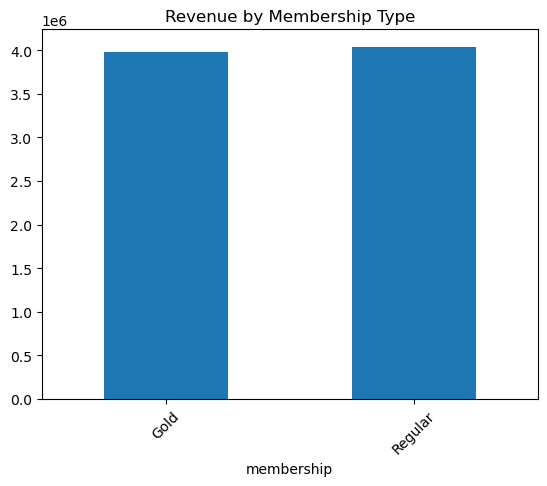

In [44]:
# ---------------------------------------------------------
# 4B. MEMBERSHIP REVENUE COMPARISON
# Objective: Compare revenue contribution
# ---------------------------------------------------------

# Sum revenue by membership type
membership_revenue = final_df.groupby('membership')['total_amount'].sum()

# Plot revenue comparison
membership_revenue.plot(
    kind='bar',
    title='Revenue by Membership Type'
)
plt.xticks(rotation=45)
plt.show()



<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='month'>

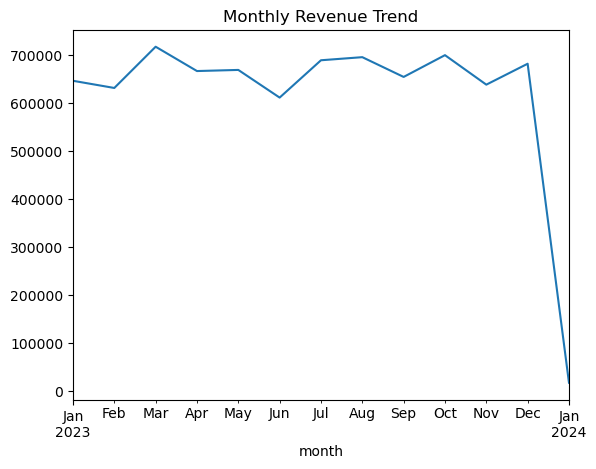

In [46]:
# ---------------------------------------------------------
# 5. REVENUE SEASONALITY ANALYSIS
# Objective: Observe revenue trends across months
# ---------------------------------------------------------

# Extract month from order date
final_df['month'] = final_df['order_date'].dt.to_period('M')

# Sum revenue for each month
monthly_revenue = final_df.groupby('month')['total_amount'].sum()

# Plot monthly revenue trend
monthly_revenue.plot(title="Monthly Revenue Trend")
